In [1]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# %% [markdown]
### 1. Importazione librerie
# %%
import time
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm  # Versione per notebook
import sys
sys.setrecursionlimit(100000)

# Configurazione grafica
sns.set_theme(style="whitegrid", palette="colorblind", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 300

In [3]:
def quicksort(arr):
    def partition(A, p, q):
        x = A[q]
        i = p - 1
        for j in range(p, q):
            if A[j] <= x:
                i += 1
                A[i], A[j] = A[j], A[i]
        A[i+1], A[q] = A[q], A[i+1]
        return i + 1

    def quicksort_recursive(A, p, q):
        if p < q:
            r = partition(A, p, q)
            quicksort_recursive(A, p, r-1)
            quicksort_recursive(A, r+1, q)
    
    quicksort_recursive(arr, 0, len(arr)-1)
    return arr

def quicksort_3way(arr):
    def quicksort_3way_recursive(arr, l, r):
        if l >= r:
            return
        lt = l
        i = l
        gt = r
        pivot = arr[l]
        while i <= gt:
            if arr[i] < pivot:
                arr[lt], arr[i] = arr[i], arr[lt]
                lt += 1
                i += 1
            elif arr[i] > pivot:
                arr[i], arr[gt] = arr[gt], arr[i]
                gt -= 1
            else:
                i += 1
        quicksort_3way_recursive(arr, l, lt-1)
        quicksort_3way_recursive(arr, gt+1, r)
    
    quicksort_3way_recursive(arr, 0, len(arr)-1)
    return arr

def counting_sort(arr):
    if len(arr) == 0:
        return arr
    
    max_val = max(arr)
    min_val = min(arr)
    
    count = [0] * (max_val - min_val + 1)
    for num in arr:
        count[num - min_val] += 1
    
    z = 0
    for i in range(len(count)):
        while count[i] > 0:
            arr[z] = i + min_val
            z += 1
            count[i] -= 1
    return arr

def radix_sort(arr):
    if len(arr) == 0:
        return arr
        
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        buckets = [[] for _ in range(10)]
        for num in arr:
            digit = (num // exp) % 10
            buckets[digit].append(num)
        
        arr = [num for bucket in buckets for num in bucket]
        exp *= 10
    return arr

In [4]:
#measure_resolution(), initialize_array(), measure_initialization_time(), measure_algorithm_time()
def measure_resolution():
    """Misura la risoluzione del clock di sistema"""
    start = time.perf_counter()
    while time.perf_counter() == start:
        pass
    end = time.perf_counter()
    return end - start

def initialize_array(n, m):
    """Genera un array di n interi casuali nell'intervallo [1, m]"""
    return [random.randint(1, m) for _ in range(n)]

def measure_initialization_time(n, m, min_time):
    """Misura il tempo medio di inizializzazione dell'array"""
    count = 0
    start_time = time.perf_counter()
    
    while True:
        arr = initialize_array(n, m)
        count += 1
        end_time = time.perf_counter()
        if end_time - start_time >= min_time:
            break
    
    total_time = end_time - start_time
    return total_time / count

def measure_algorithm_time(algorithm, n, m, min_time, avg_init_time=None):
    """Misura il tempo medio di esecuzione dell'algoritmo"""
    count = 0
    start_time = time.perf_counter()
    
    while True:
        arr = initialize_array(n, m)
        algorithm(arr.copy())  # Usiamo una copia per preservare l'array originale
        count += 1
        end_time = time.perf_counter()
        if end_time - start_time >= min_time:
            break
    
    total_time = end_time - start_time
    avg_total_time = total_time / count
    
    if avg_init_time is not None:
        return avg_total_time - avg_init_time
    return avg_total_time

In [5]:
# %%
resolution = measure_resolution()
T_min = resolution * 1.5  # Formula data: T_min = R * (1/2 + 1)

# Configurazione algoritmi
ALGORITHMS = {
    'QuickSort': quicksort,
    'QuickSort3Way': quicksort_3way,
    'CountingSort': counting_sort,
    'RadixSort': radix_sort
}

# Parametri per le serie geometriche
N_POINTS = 100
N_MIN, N_MAX = 100, 100000
M_MIN, M_MAX = 10, 1000000
N_FIXED = 10000
M_FIXED = 100000

# Generazione valori per n e m (serie geometrica)
n_values = [int(N_MIN * (N_MAX / N_MIN) ** (i / (N_POINTS - 1))) for i in range(N_POINTS)]
m_values = [int(M_MIN * (M_MAX / M_MIN) ** (i / (N_POINTS - 1))) for i in range(N_POINTS)]

In [6]:
def run_experiments():
    results = []
    
    # Esperimento 1: Variazione di n (m fissato a 100000)
    print("="*50)
    print("ESPERIMENTO 1: Variazione dimensione array (n)")
    print("="*50)
    
    for n in tqdm(n_values, desc="Variazione n"):
        # Misura tempo medio inizializzazione
        avg_init_time = measure_initialization_time(n, M_FIXED, T_min)
        
        for algo_name, algorithm in ALGORITHMS.items():
            # Evita CountingSort per n molto grandi
            if algo_name == 'CountingSort' and n > 50000:
                continue
                
            avg_time = measure_algorithm_time(algorithm, n, M_FIXED, T_min, avg_init_time)
            results.append({
                'algorithm': algo_name,
                'n': n,
                'm': M_FIXED,
                'time': avg_time,
                'type': 'Variazione n'
            })
    
    # Esperimento 2: Variazione di m (n fissato a 10000)
    print("\n" + "="*50)
    print("ESPERIMENTO 2: Variazione range valori (m)")
    print("="*50)
    
    for m in tqdm(m_values, desc="Variazione m"):
        # Misura tempo medio inizializzazione
        avg_init_time = measure_initialization_time(N_FIXED, m, T_min)
        
        for algo_name, algorithm in ALGORITHMS.items():
            # Evita algoritmi non adatti per m molto grandi
            if algo_name == 'CountingSort' and m > 100000:
                continue
                
            avg_time = measure_algorithm_time(algorithm, N_FIXED, m, T_min, avg_init_time)
            results.append({
                'algorithm': algo_name,
                'n': N_FIXED,
                'm': m,
                'time': avg_time,
                'type': 'Variazione m'
            })
    
    # Esperimento 3: Caso peggiore per QuickSort (array ordinato)
    print("\n" + "="*50)
    print("ESPERIMENTO 3: Caso peggiore QuickSort")
    print("="*50)
    
    for n in tqdm(n_values[:50], desc="Caso peggiore"):  # Limita a 50 punti per efficienza
        # Crea array ordinato (caso peggiore per QuickSort)
        arr = list(range(1, n+1))
        
        # Misura diretta senza inizializzazione
        def measure_worst_case(algorithm):
            count = 0
            start_time = time.perf_counter()
            while True:
                arr_copy = arr.copy()
                algorithm(arr_copy)
                count += 1
                end_time = time.perf_counter()
                if end_time - start_time >= T_min:
                    break
            return (end_time - start_time) / count
        
        # Misura per QuickSort classico
        avg_time_qs = measure_worst_case(quicksort)
        results.append({
            'algorithm': 'QuickSort (worst)',
            'n': n,
            'm': n,
            'time': avg_time_qs,
            'type': 'Caso peggiore'
        })
        
        # Misura per QuickSort 3-way
        avg_time_qs3 = measure_worst_case(quicksort_3way)
        results.append({
            'algorithm': 'QuickSort3Way (worst)',
            'n': n,
            'm': n,
            'time': avg_time_qs3,
            'type': 'Caso peggiore'
        })
    
    return pd.DataFrame(results)

In [8]:
df = run_experiments()
df.to_csv('sorting_algorithms_data.csv', index=False)

ESPERIMENTO 1: Variazione dimensione array (n)


Variazione n:   0%|          | 0/100 [00:00<?, ?it/s]


ESPERIMENTO 2: Variazione range valori (m)


Variazione m:   0%|          | 0/100 [00:00<?, ?it/s]


ESPERIMENTO 3: Caso peggiore QuickSort


Caso peggiore:   0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
# === AGGREGAZIONE ROBUSTA: calcola media e std per i tre scenari ===
import pandas as pd
import numpy as np

# Controlli minimi
expected_cols = {'algorithm','time','type'}
missing = expected_cols - set(df.columns)
if missing:
    raise KeyError(f"Mancano colonne attese {missing} in df")

def agg_by(df_sub, keys):
    g = (df_sub
         .groupby(['algorithm'] + keys, as_index=False)['time']
         .agg(['mean','std'])
         .reset_index()
         .rename(columns={'mean':'time_mean','std':'time_std'}))
    g['time_std'] = g['time_std'].fillna(0.0)
    return g

# Adatta i nomi 'type' se nel tuo df sono leggermente diversi
df_n = agg_by(df[df['type'] == 'Variazione n'], ['n'])
df_m = agg_by(df[df['type'] == 'Variazione m'], ['m'])
df_worst = agg_by(df[df['type'] == 'Caso peggiore'], ['n'])

# Salva per debug/riuso
df.to_csv('raw_sorting_data.csv', index=False)
df_n.to_csv('agg_n.csv', index=False)
df_m.to_csv('agg_m.csv', index=False)
df_worst.to_csv('agg_worst.csv', index=False)

print("Aggregazione OK: creati df_n, df_m, df_worst con time_mean/time_std.")

Aggregazione OK: creati df_n, df_m, df_worst con time_mean/time_std.


In [13]:
# Filtra i dati per tipo di esperimento
#df_n = df[df['type'] == 'Variazione n']
#df_m = df[df['type'] == 'Variazione m']
#df_worst = df[df['type'] == 'Caso peggiore']

In [15]:
import pandas as pd

def chk(name, dfx, xcol):
    print(f"\n[{name}] colonne:", list(dfx.columns))
    need = {'algorithm', xcol, 'time_mean', 'time_std'}
    missing = need - set(dfx.columns)
    if missing:
        print(f"  -> MANCANO: {missing}")
    else:
        print("  -> OK")
    print("  -> righe:", len(dfx))
    print(dfx.head(3))

chk("df_n", df_n, 'n')
chk("df_m", df_m, 'm')
chk("df_worst", df_worst, 'n')


[df_n] colonne: ['index', 'algorithm', 'n', 'time_mean', 'time_std']
  -> OK
  -> righe: 390
   index     algorithm    n  time_mean  time_std
0      0  CountingSort  100   0.005796       0.0
1      1  CountingSort  107   0.003860       0.0
2      2  CountingSort  114   0.005137       0.0

[df_m] colonne: ['index', 'algorithm', 'm', 'time_mean', 'time_std']
  -> OK
  -> righe: 380
   index     algorithm   m  time_mean  time_std
0      0  CountingSort  10   0.003651       0.0
1      1  CountingSort  11   0.001843       0.0
2      2  CountingSort  12   0.001264       0.0

[df_worst] colonne: ['index', 'algorithm', 'n', 'time_mean', 'time_std']
  -> OK
  -> righe: 100
   index          algorithm    n  time_mean  time_std
0      0  QuickSort (worst)  100   0.000375       0.0
1      1  QuickSort (worst)  107   0.000368       0.0
2      2  QuickSort (worst)  114   0.000411       0.0


Salvato tempo_vs_n_lineare_improved.png


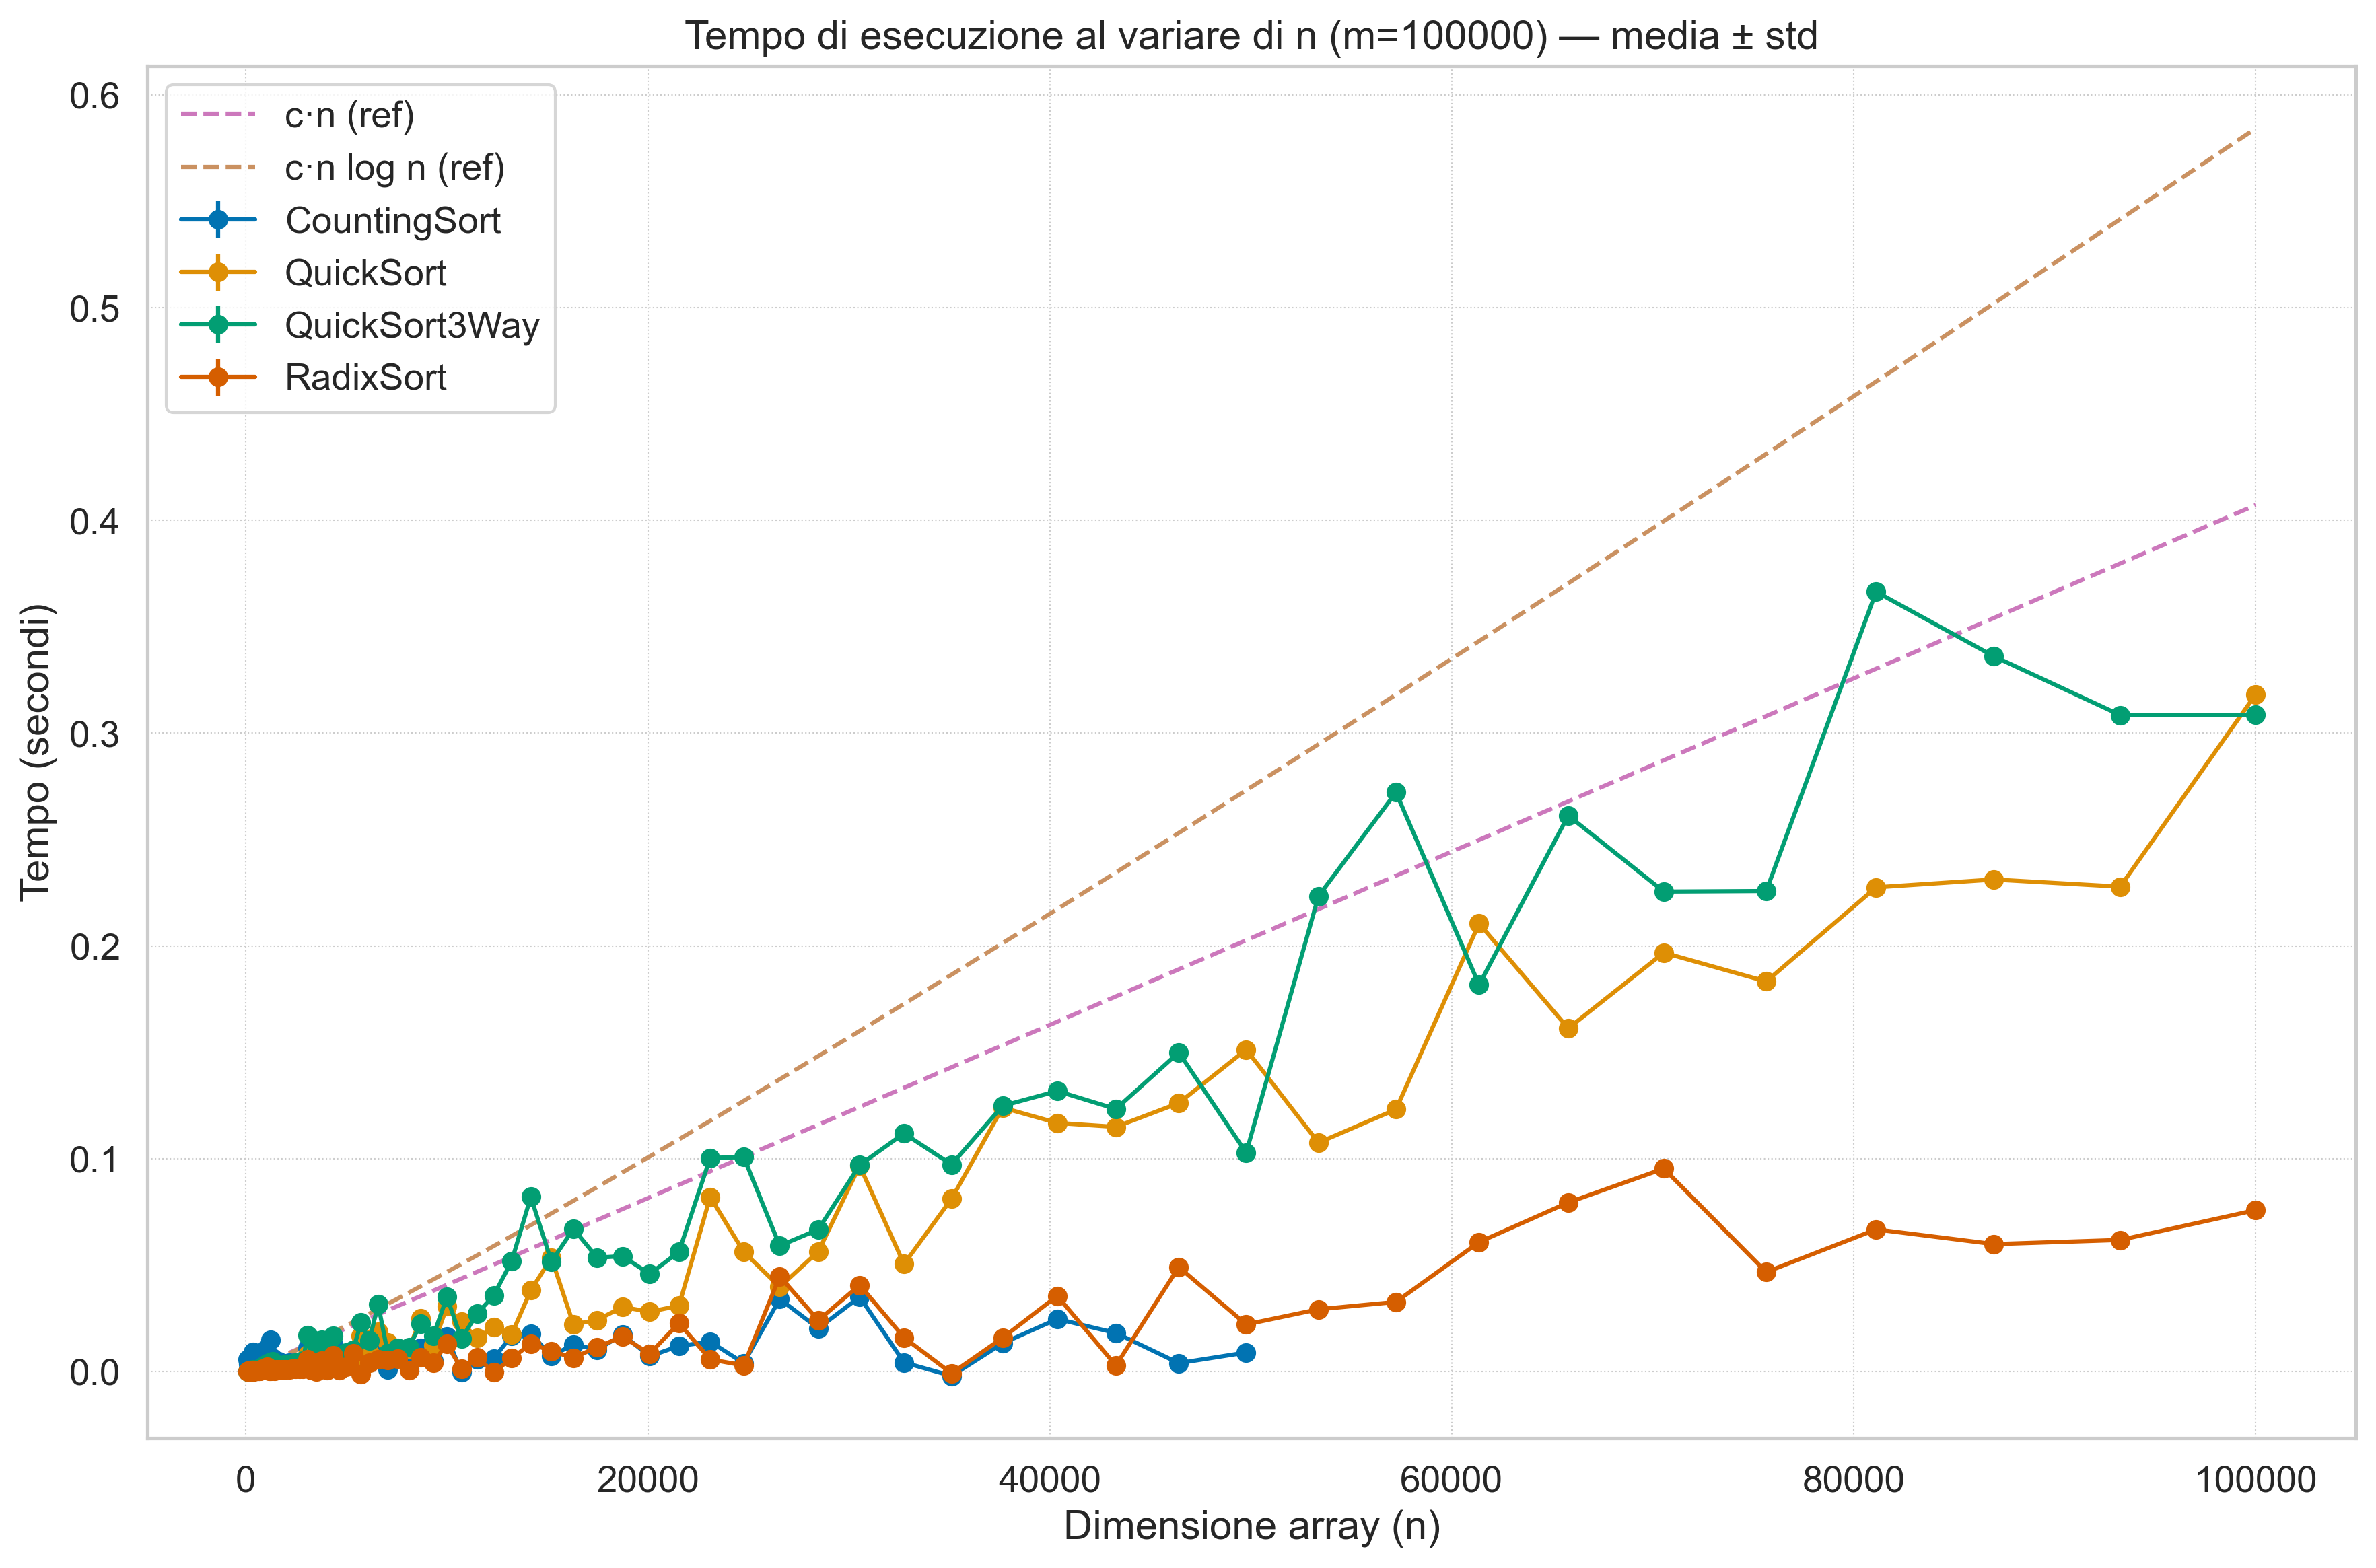

In [16]:
# GRAFICO 1: Tempo vs n (scala lineare) — media ± std, curve teoriche di riferimento
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
for algo, g in df_n.groupby('algorithm'):
    # ordina per n
    g = g.sort_values('n')
    plt.errorbar(g['n'], g['time_mean'], yerr=g['time_std'], label=algo, marker='o', linestyle='-')

# Aggiungi curve di riferimento normalizzate a un punto mediano (es. n0)
n_vals = np.array(sorted(df_n['n'].unique()))
if len(n_vals)>1:
    n0 = int(np.median(n_vals))
    # cerca un tempo di riferimento (pref. QuickSort mediano)
    ref = df_n[df_n['algorithm'].str.contains('QuickSort')].groupby('n')['time_mean'].median()
    if len(ref)>0:
        # prendi valore più vicino a n0
        if n0 not in ref.index:
            n0 = int(ref.index[ (np.abs(ref.index - n0)).argmin() ])
        t0 = ref.loc[n0]
        plt.plot(n_vals, t0*(n_vals/n0), '--', label='c·n (ref)')
        plt.plot(n_vals, t0*(n_vals/n0)*np.log(n_vals)/np.log(n0), '--', label='c·n log n (ref)')

plt.title("Tempo di esecuzione al variare di n (m=100000) — media ± std")
plt.xlabel("Dimensione array (n)")
plt.ylabel("Tempo (secondi)")
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig('tempo_vs_n_lineare_improved.png', dpi=300)
print("Salvato tempo_vs_n_lineare_improved.png")

Salvato tempo_vs_n_loglog_improved.png


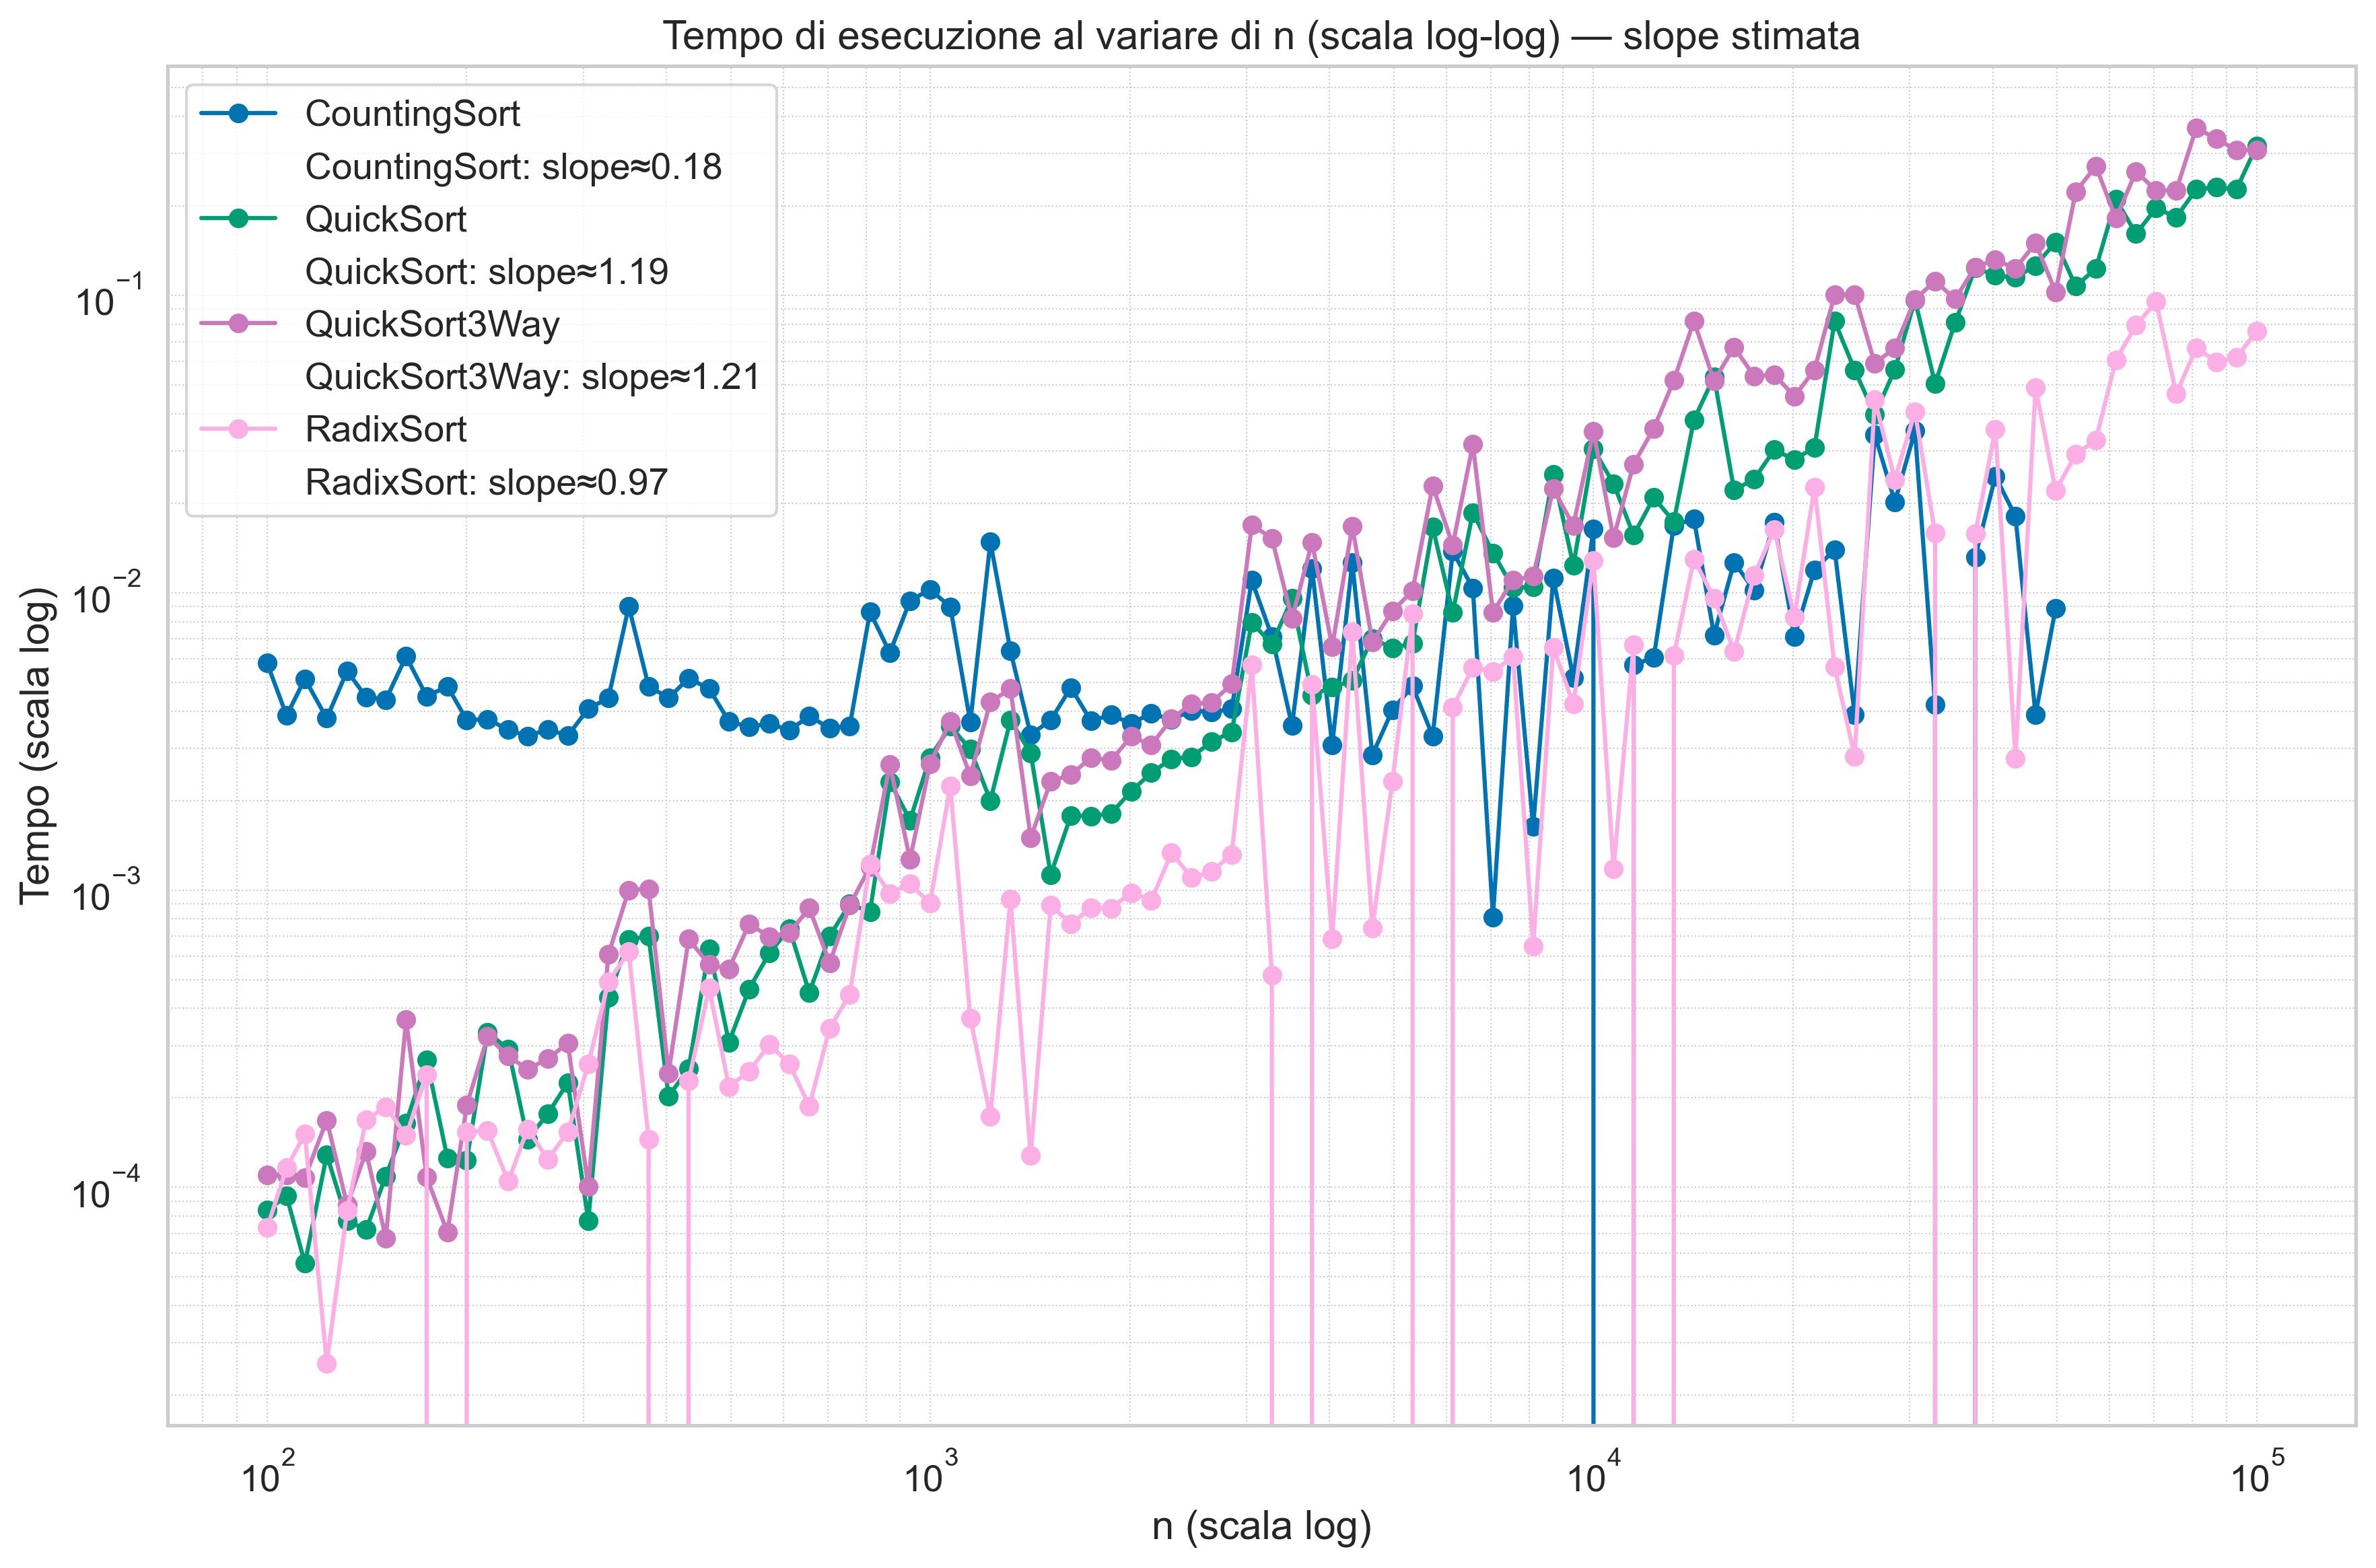

In [17]:
# GRAFICO 2: Tempo vs n (scala log-log) — stima slope su log-log
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
for algo, g in df_n.groupby('algorithm'):
    g = g.sort_values('n')
    x = g['n'].values
    y = g['time_mean'].values
    plt.plot(x, y, marker='o', label=algo)
    if (x>0).sum() >= 3 and (y>0).sum() >= 3:
        mask = (x>0) & (y>0)
        a, b = np.polyfit(np.log(x[mask]), np.log(y[mask]), 1)
        plt.plot([], [], ' ', label=f"{algo}: slope≈{a:.2f}")

plt.xscale('log'); plt.yscale('log')
plt.title("Tempo di esecuzione al variare di n (scala log-log) — slope stimata")
plt.xlabel("n (scala log)")
plt.ylabel("Tempo (scala log)")
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig('tempo_vs_n_loglog_improved.png', dpi=300)
print("Salvato tempo_vs_n_loglog_improved.png")

Salvato tempo_vs_m_lineare_improved.png


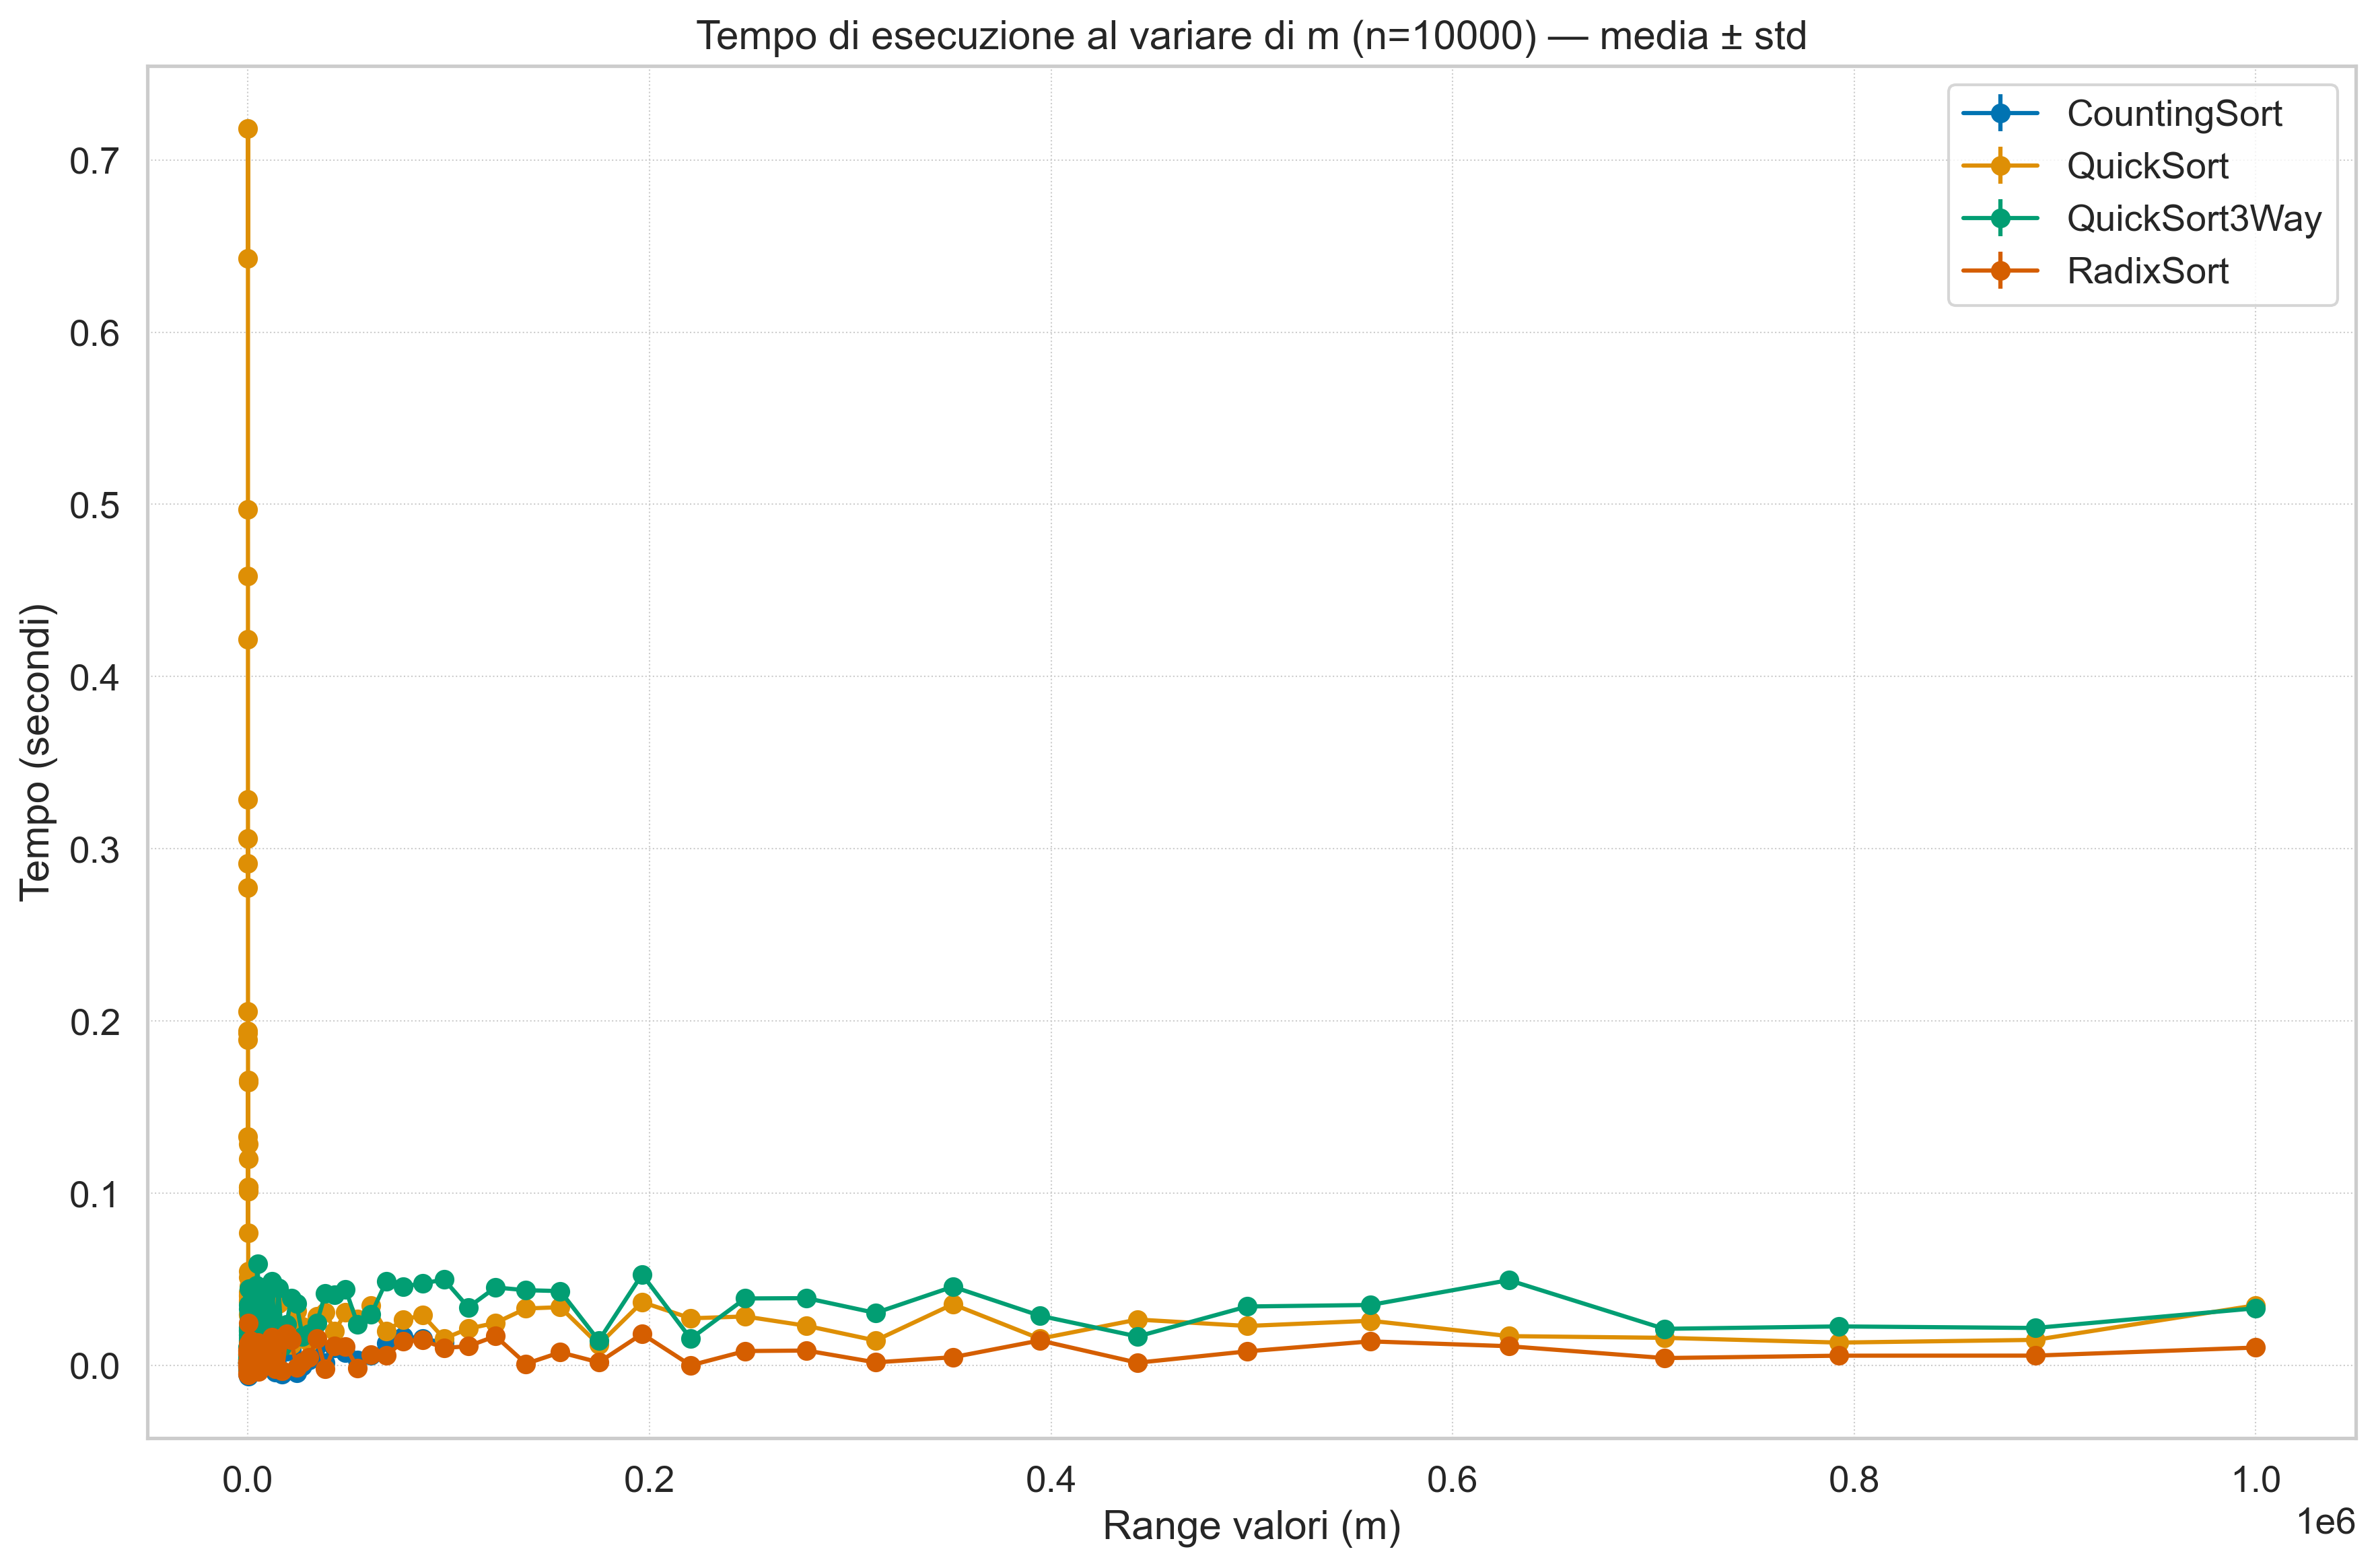

In [18]:
# GRAFICO 3: Tempo vs m (scala lineare) — media ± std
plt.figure(figsize=(12,8))
for algo, g in df_m.groupby('algorithm'):
    g = g.sort_values('m')
    plt.errorbar(g['m'], g['time_mean'], yerr=g['time_std'], label=algo, marker='o', linestyle='-')

plt.title("Tempo di esecuzione al variare di m (n=10000) — media ± std")
plt.xlabel("Range valori (m)")
plt.ylabel("Tempo (secondi)")
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig('tempo_vs_m_lineare_improved.png', dpi=300)
print("Salvato tempo_vs_m_lineare_improved.png")

Salvato tempo_vs_m_loglog_improved.png


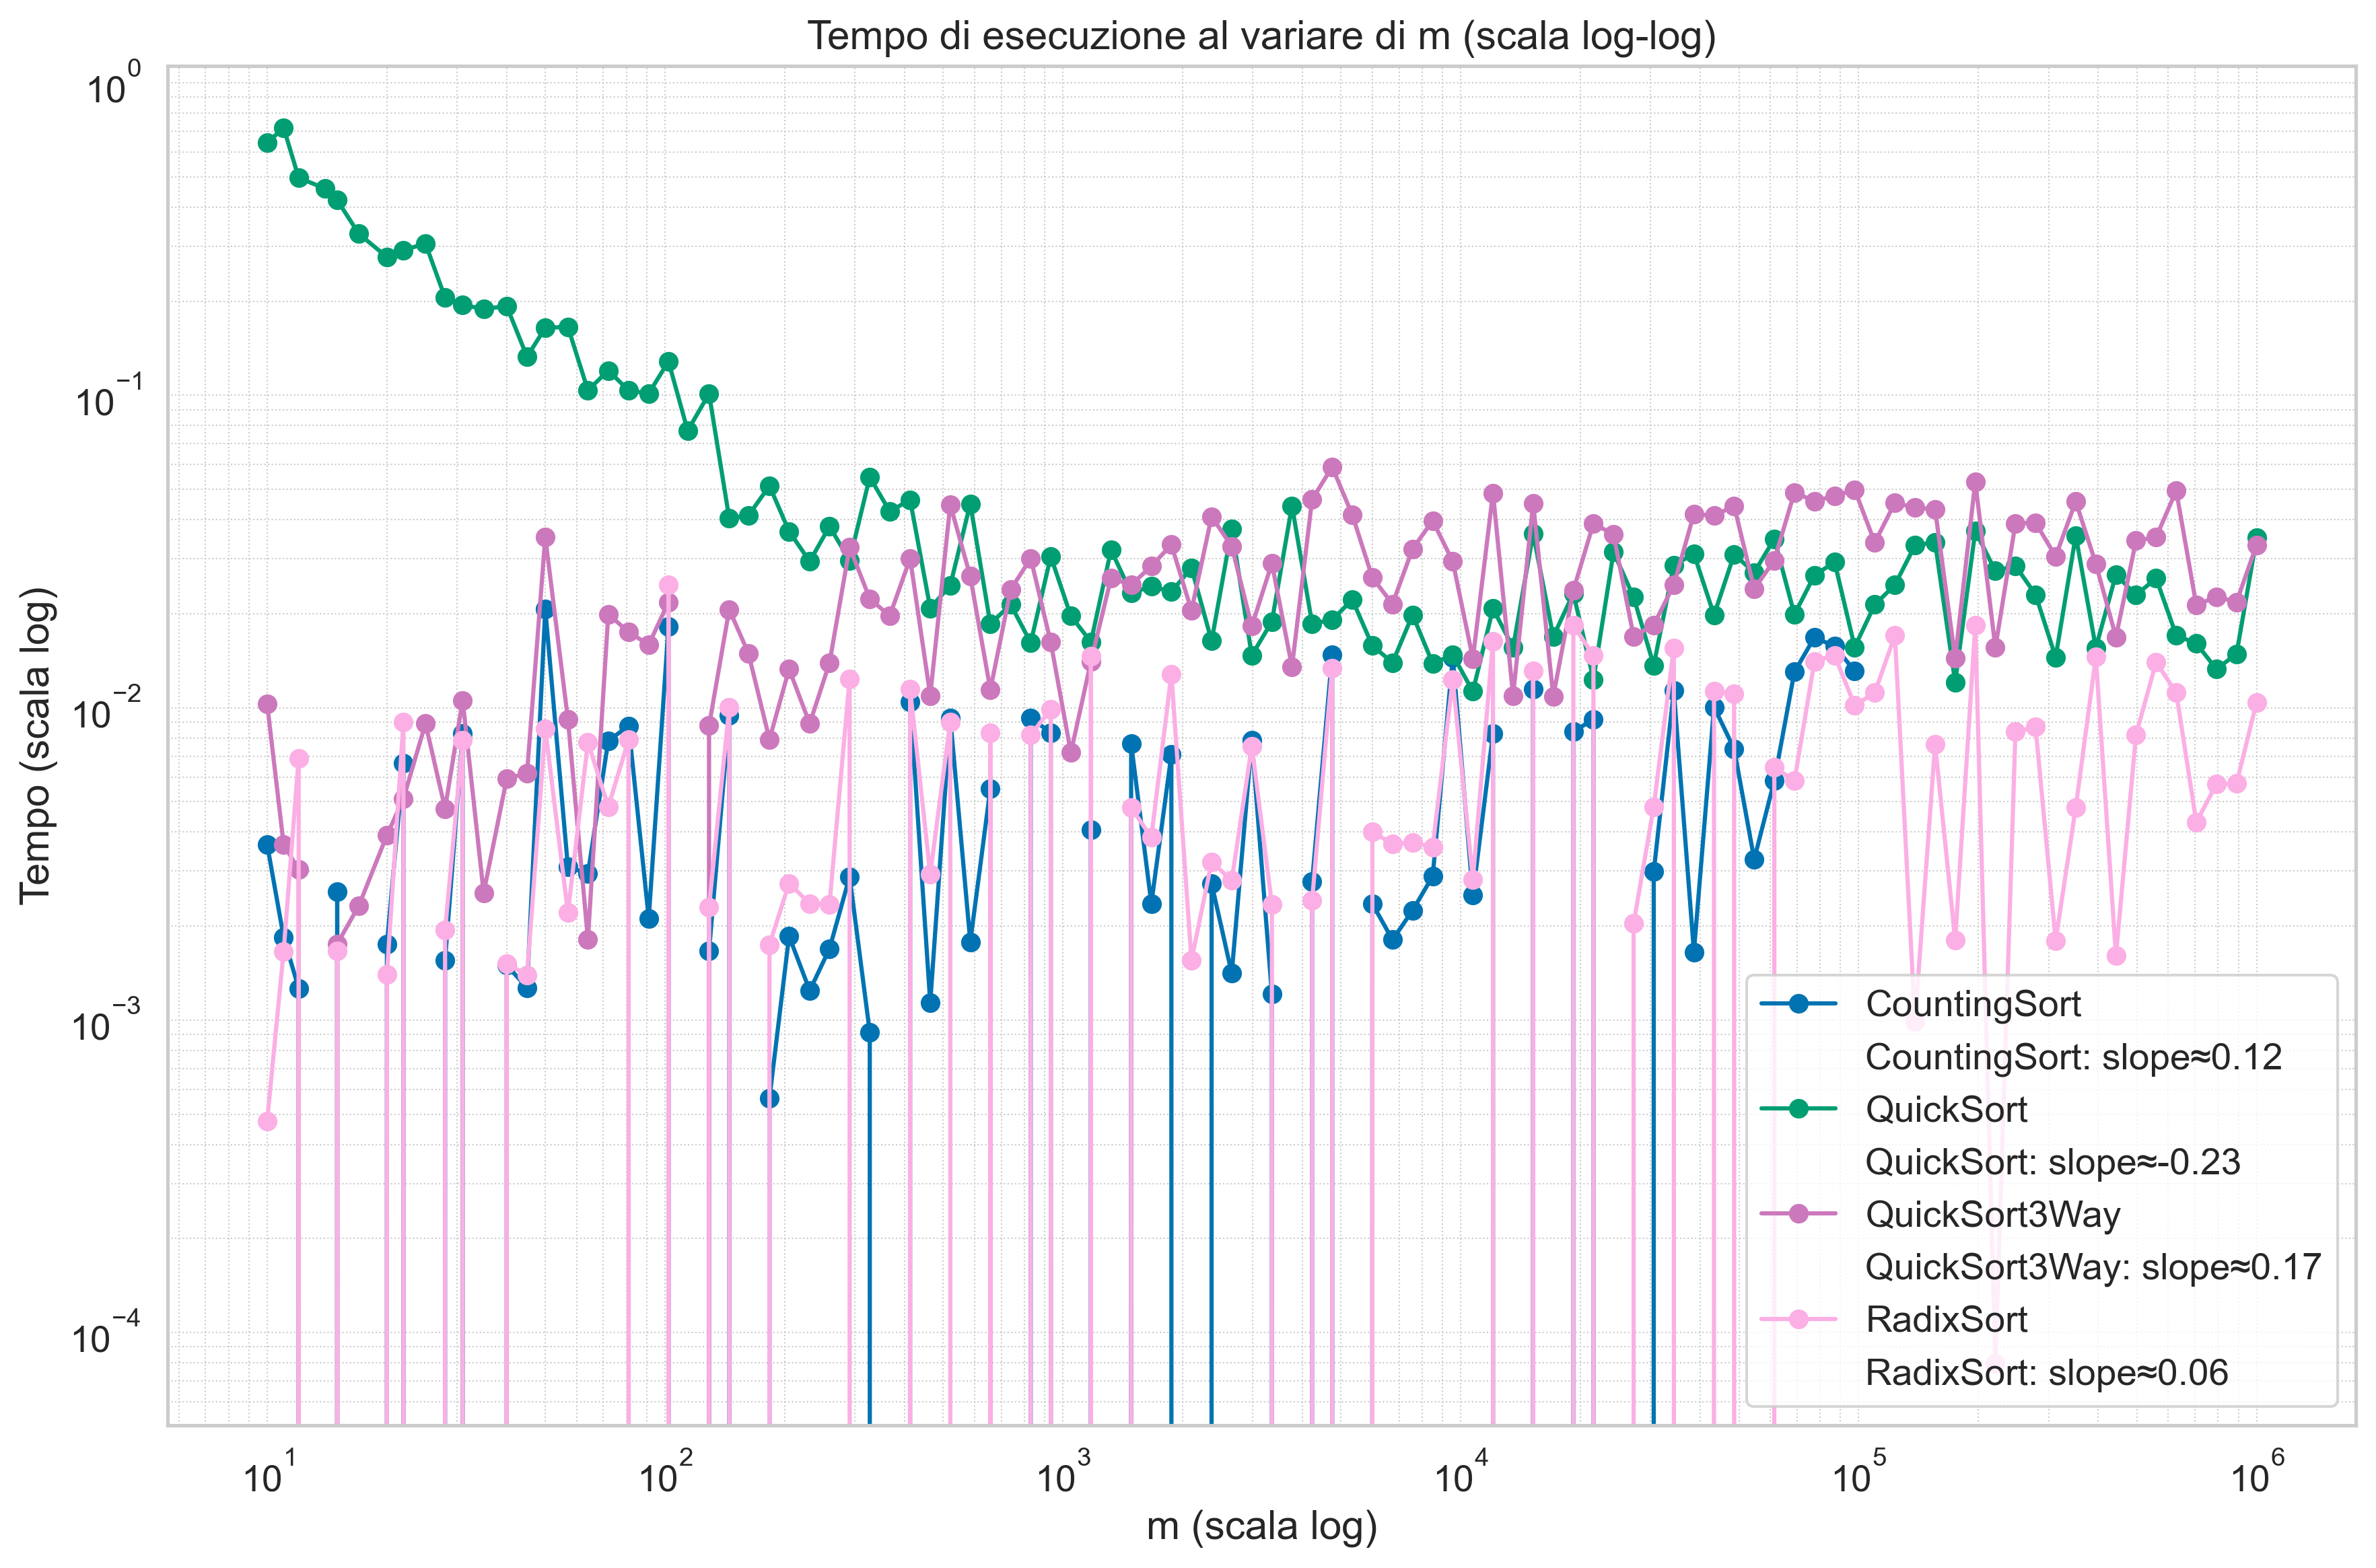

In [19]:
# GRAFICO 4: Tempo vs m (scala log-log) — stima slope su log-log
plt.figure(figsize=(12,8))
for algo, g in df_m.groupby('algorithm'):
    g = g.sort_values('m')
    x = g['m'].values
    y = g['time_mean'].values
    plt.plot(x, y, marker='o', label=algo)
    if (x>0).sum() >= 3 and (y>0).sum() >= 3:
        mask = (x>0) & (y>0)
        a, b = np.polyfit(np.log(x[mask]), np.log(y[mask]), 1)
        plt.plot([], [], ' ', label=f"{algo}: slope≈{a:.2f}")

plt.xscale('log'); plt.yscale('log')
plt.title("Tempo di esecuzione al variare di m (scala log-log)")
plt.xlabel("m (scala log)")
plt.ylabel("Tempo (scala log)")
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig('tempo_vs_m_loglog_improved.png', dpi=300)
print("Salvato tempo_vs_m_loglog_improved.png")

Salvato confronto_casi_peggiori_loglog.png


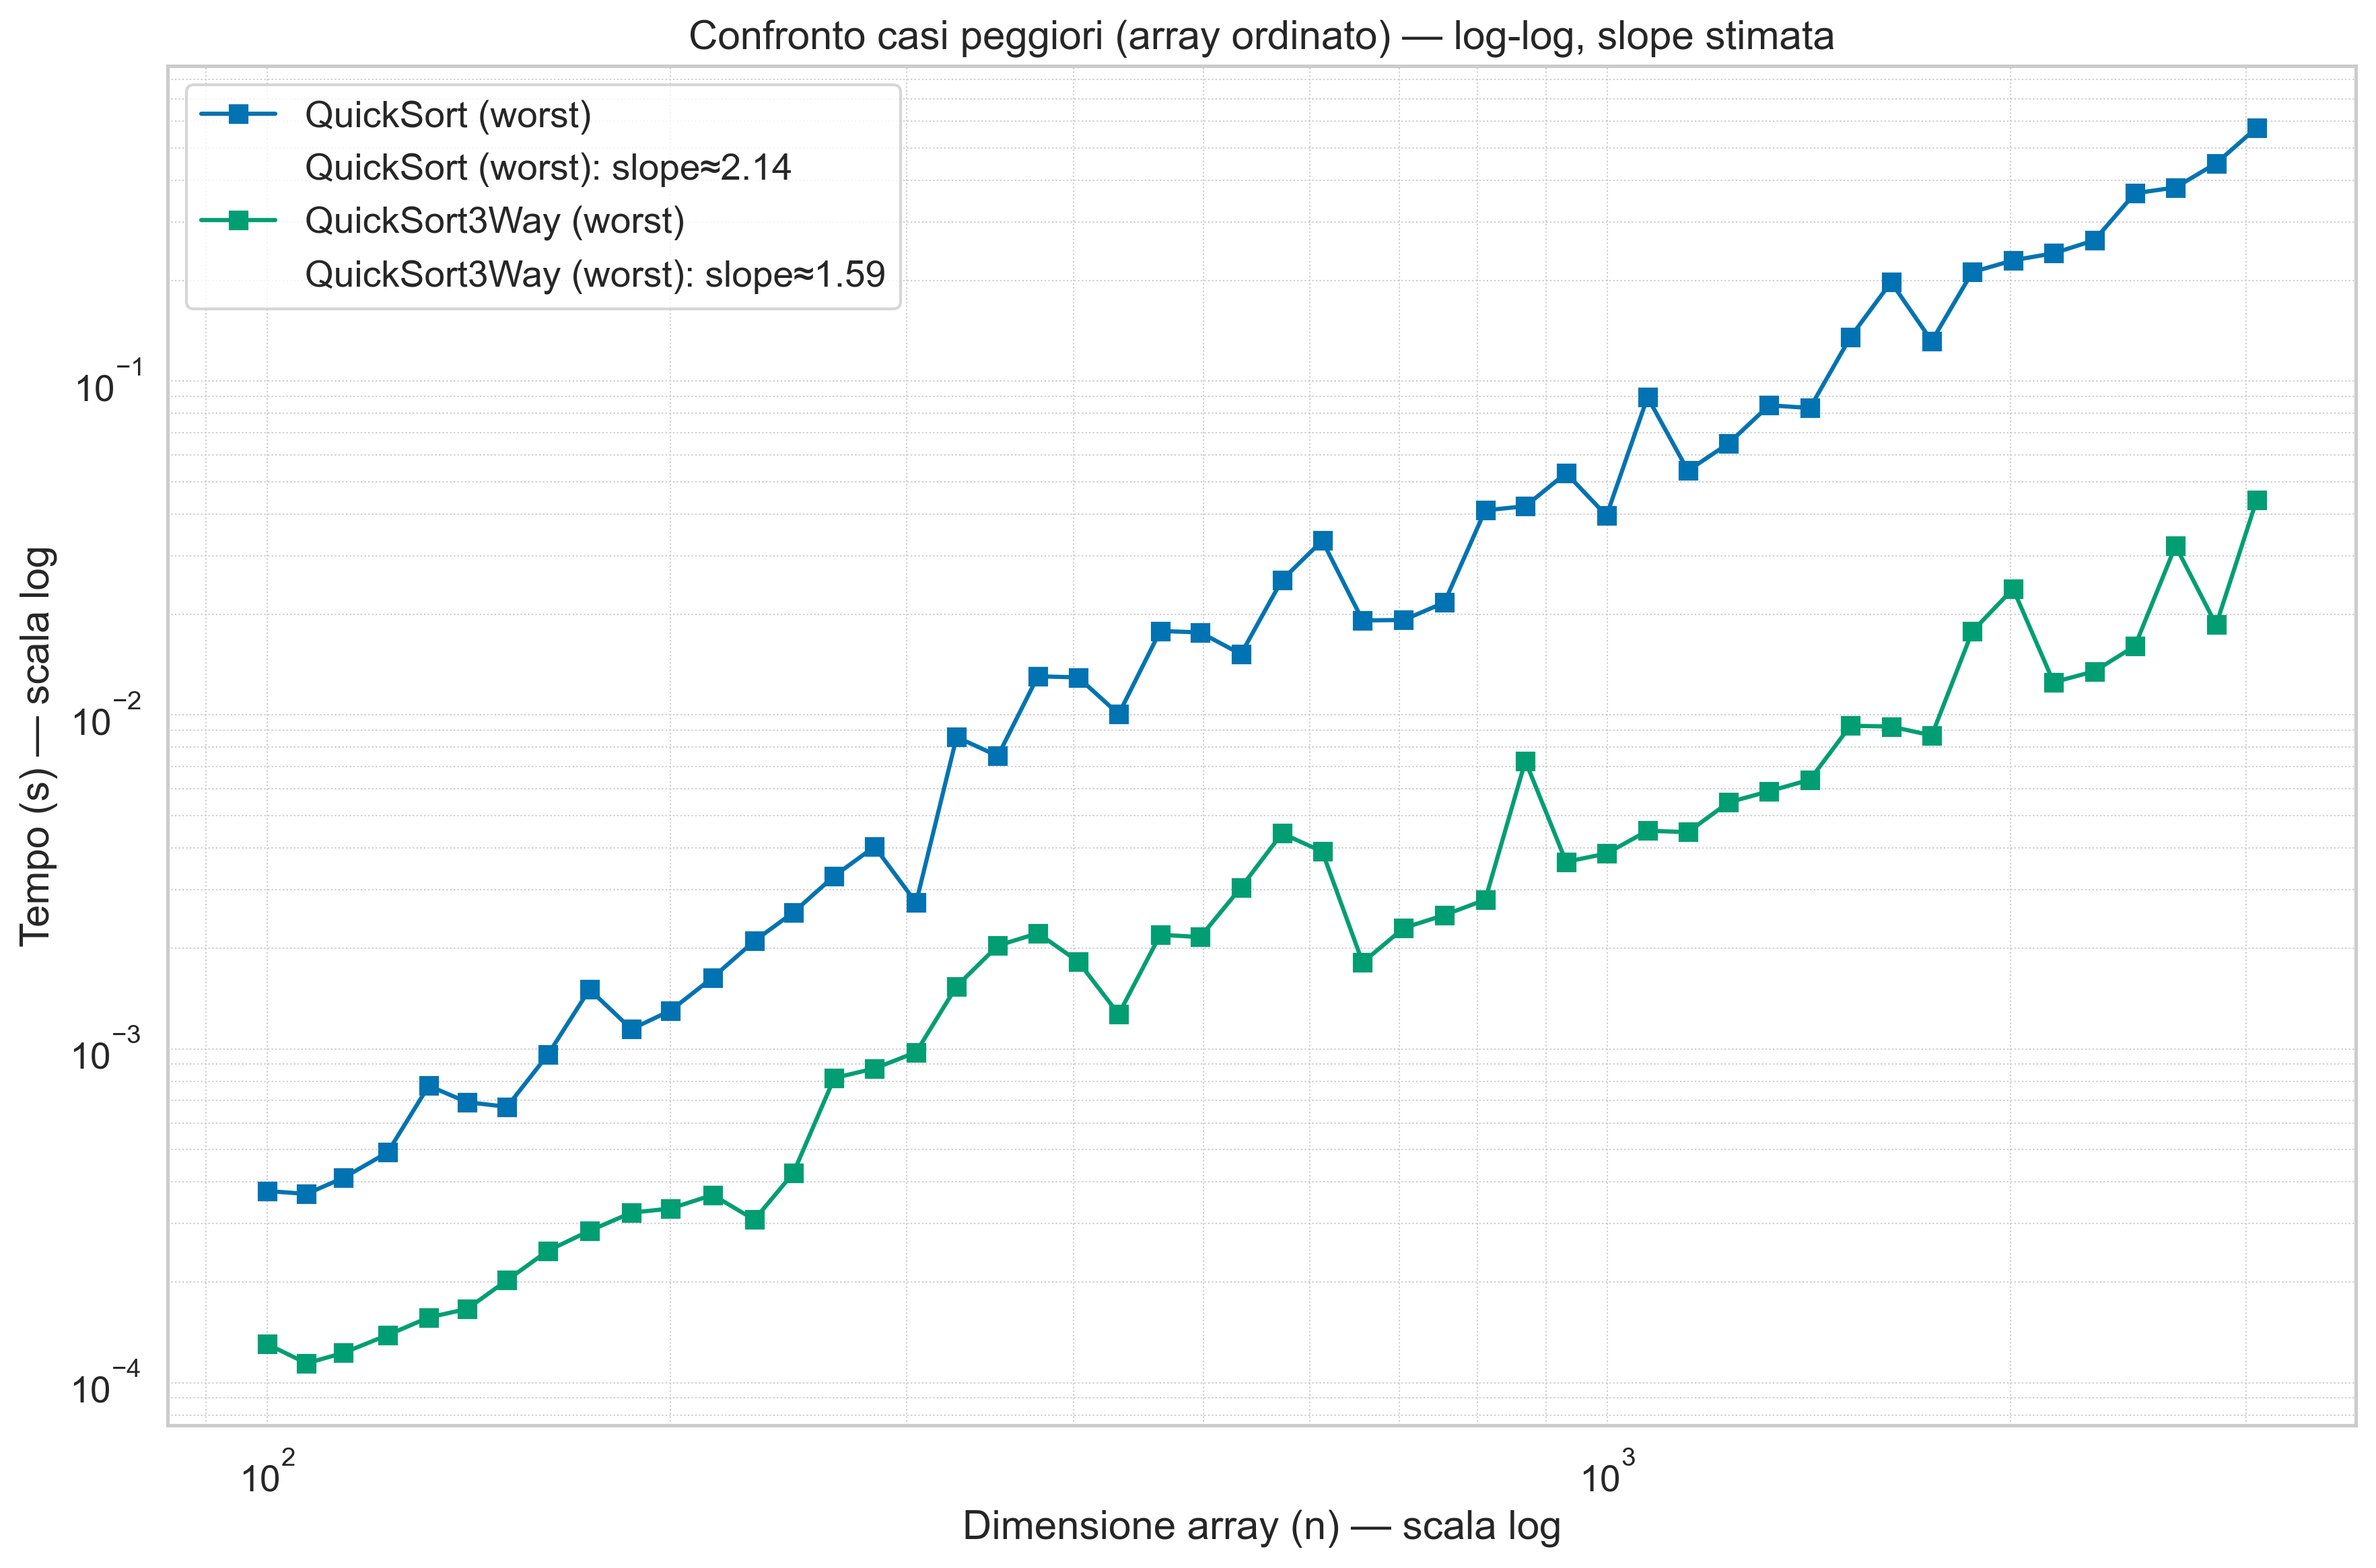

In [20]:
# GRAFICO 5: Confronto casi peggiori (array ordinato) — log-log per stimare esponenti
plt.figure(figsize=(12,8))
for algo, g in df_worst.groupby('algorithm'):
    g = g.sort_values('n')
    x = g['n'].values
    y = g['time_mean'].values
    plt.plot(x, y, marker='s', label=algo)
    if (x>0).sum() >= 3 and (y>0).sum() >= 3:
        mask = (x>0) & (y>0)
        a, b = np.polyfit(np.log(x[mask]), np.log(y[mask]), 1)
        plt.plot([], [], ' ', label=f"{algo}: slope≈{a:.2f}")

plt.xscale('log'); plt.yscale('log')
plt.title("Confronto casi peggiori (array ordinato) — log-log, slope stimata")
plt.xlabel("Dimensione array (n) — scala log")
plt.ylabel("Tempo (s) — scala log")
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig('confronto_casi_peggiori_loglog.png', dpi=300)
print("Salvato confronto_casi_peggiori_loglog.png")

Salvato impatto_m_counting_radix_improved.png


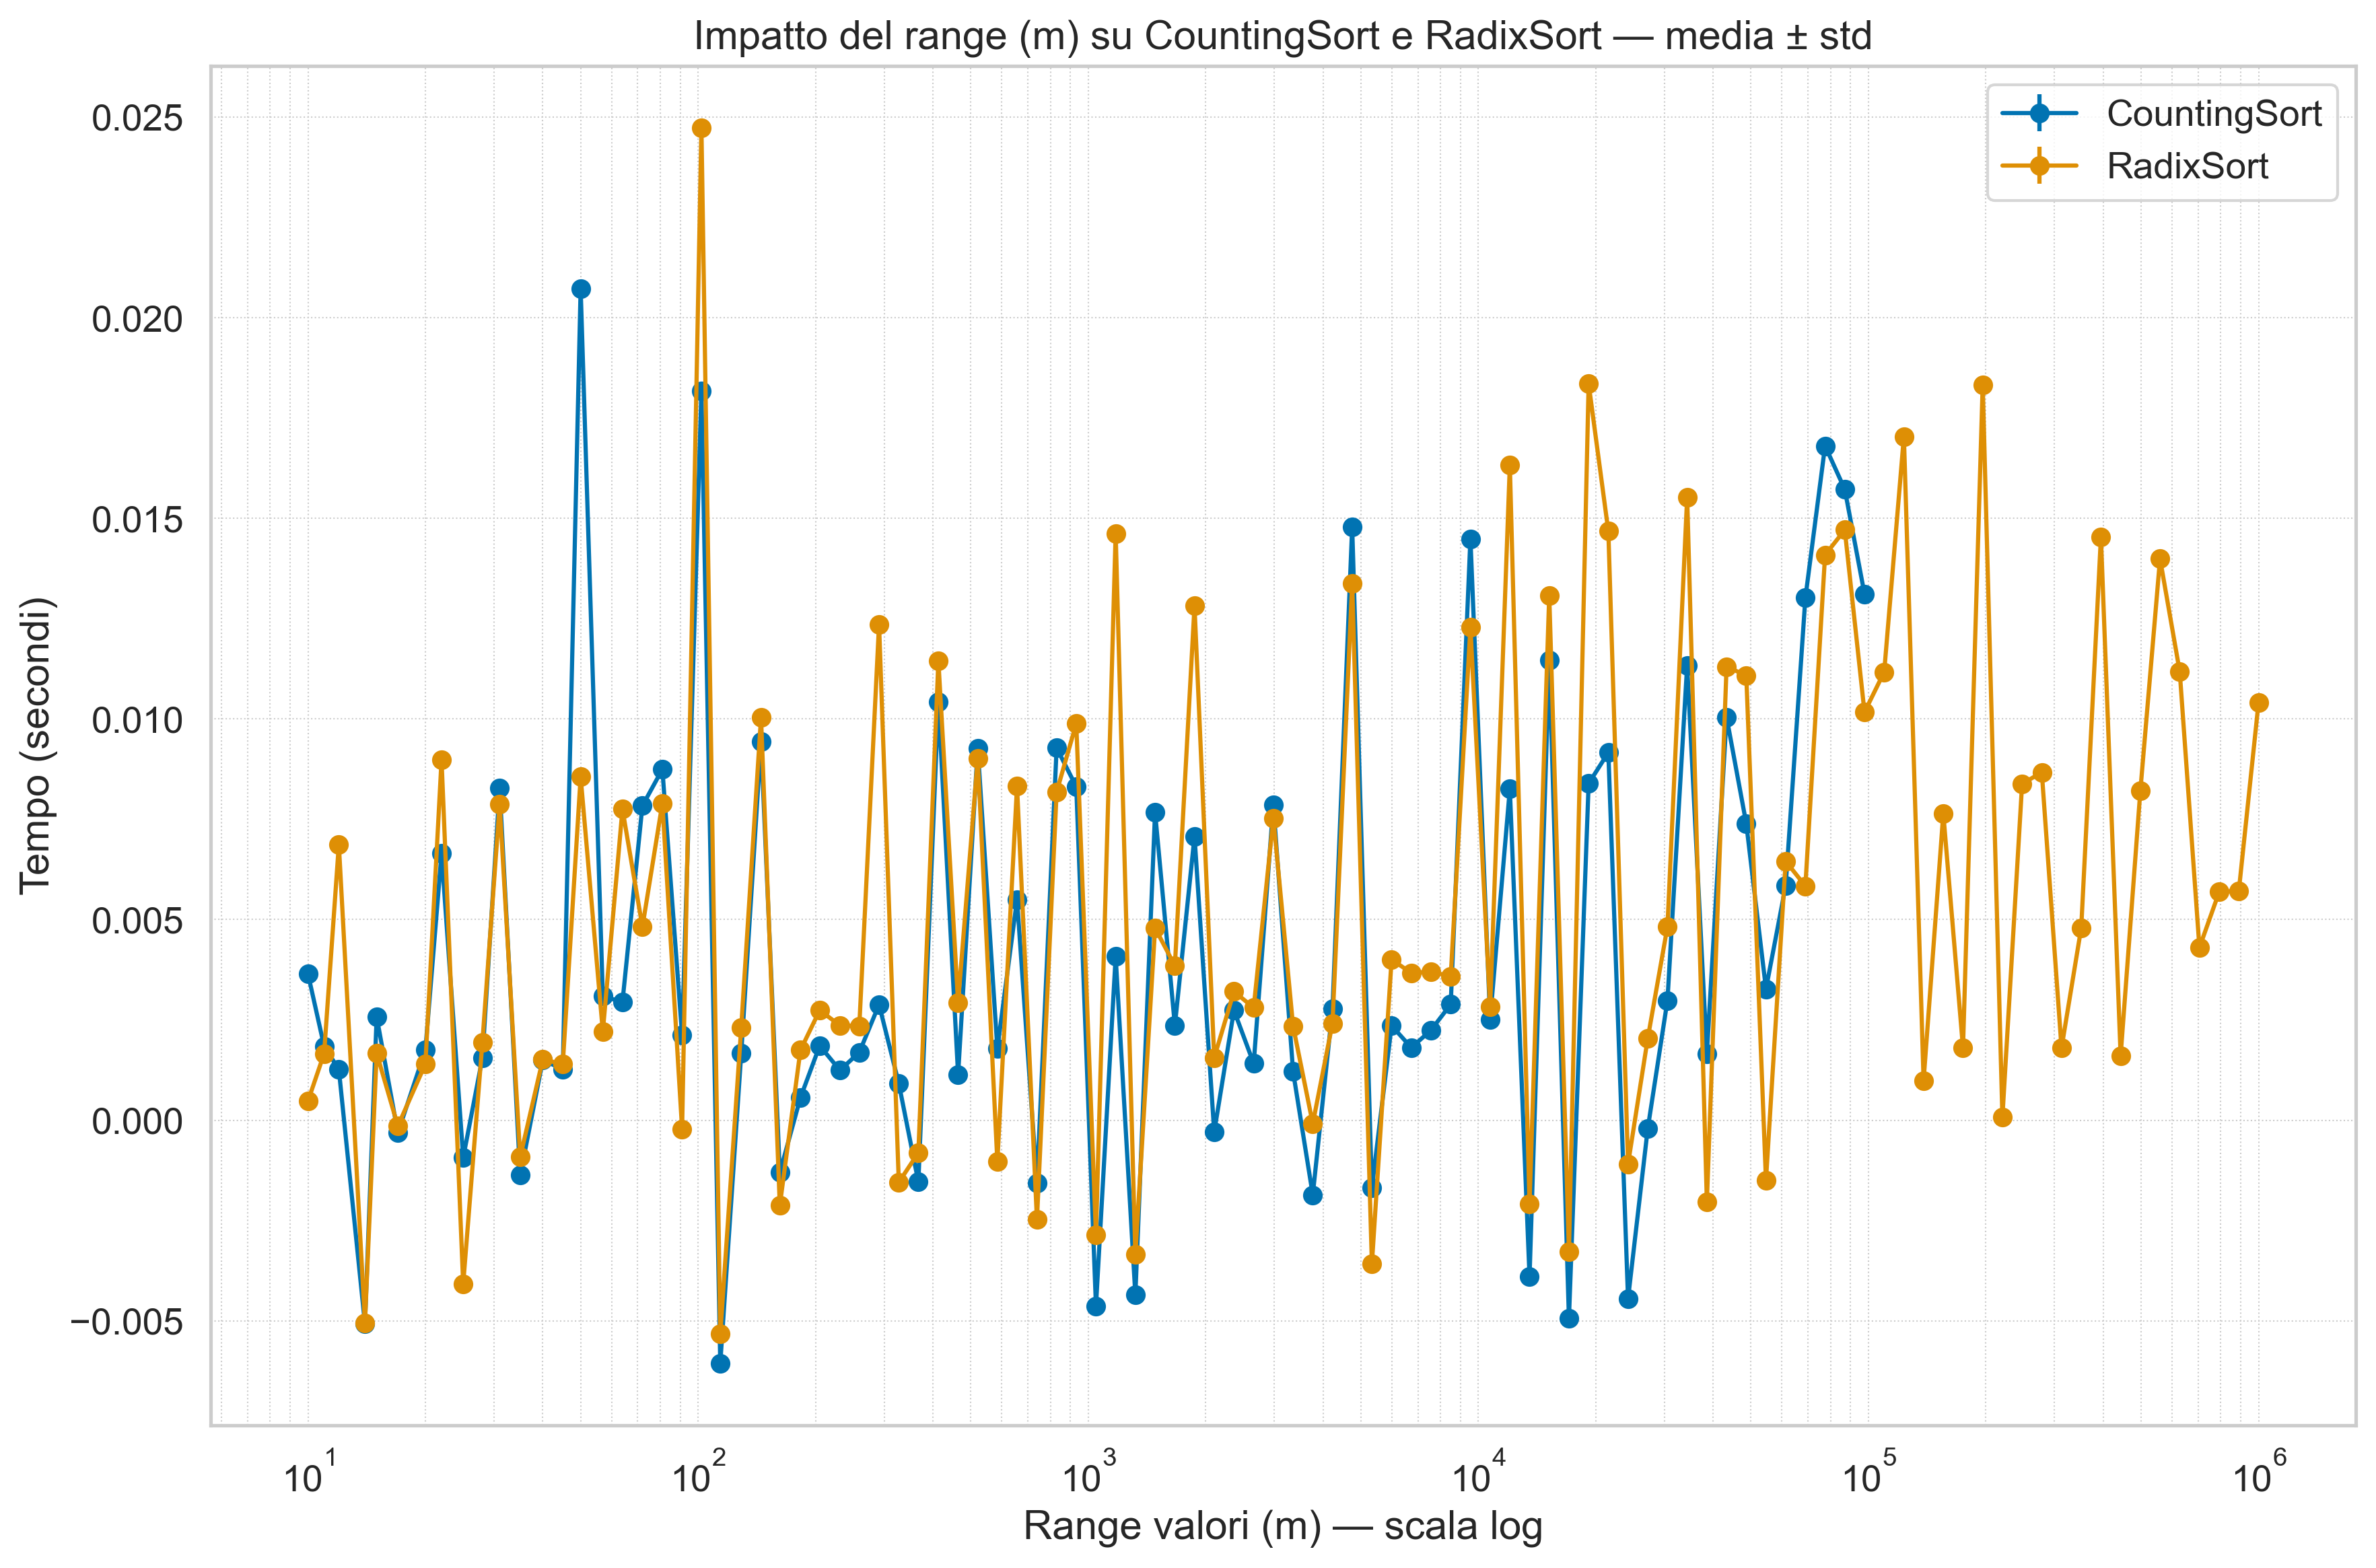

In [21]:
# GRAFICO 6: Impatto di m su CountingSort e RadixSort (x in scala log)
plt.figure(figsize=(12,8))
df_m_filtered = df_m[df_m['algorithm'].isin(['CountingSort', 'RadixSort'])].copy()
for algo, g in df_m_filtered.groupby('algorithm'):
    g = g.sort_values('m')
    plt.errorbar(g['m'], g['time_mean'], yerr=g['time_std'], label=algo, marker='o', linestyle='-')

plt.xscale('log')
plt.title("Impatto del range (m) su CountingSort e RadixSort — media ± std")
plt.xlabel("Range valori (m) — scala log")
plt.ylabel("Tempo (secondi)")
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig('impatto_m_counting_radix_improved.png', dpi=300)
print("Salvato impatto_m_counting_radix_improved.png")

In [22]:
#salva dati
df_full = pd.concat([df_n, df_m, df_worst])
df_full.to_csv('sorting_algorithms_data.csv', index=False)